# FIFA 21 Player Dataset Cleaning
## FIFA 21 球员表 数据清理

content：adjust column name，reset correct data type，delete unuseful information. to make the whole dataset more precise and clean
主要内容：修改列名，修改数据类型，修改具体数据的格式等使其更美观。

import packages.import data file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('fifa21 raw data v2.csv')
pd.set_option('display.max_columns',1000) #to inspect more columns.方便观察整张表

C:\Users\54396\AppData\Local\Temp\ipykernel_968\4228399769.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21 raw data v2.csv')


In [4]:
# adjust column name(personal habit)
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('↓','')

In [5]:
df = df.rename(columns={'OVA':'Overall_desc'})

data cleaning. Remove strings '\n\n\n\n' from column club. 将club这一列中前面部分的字符串删去

In [6]:
df['Club'] = df['Club'].str.replace('\n\n\n\n','')

remove unneeded columns.删去不需要的列

In [7]:
drop_columns = ['photoUrl','playerUrl','Loan_Date_End']
df = df.drop(columns = drop_columns)

column Weight and column Height have the same issue that contains values in both centimeters and feet/inches or both pounds and kilograms
convert all feet/inches/pounds to cm/kg
在Weight跟Height列中的数据单位不统一，Height中身高既有厘米制又有英尺，Weight中情况一样，需将他们的单位统一

In [8]:
for i in range(len(df)):
    Height = df.loc[i,'Height']
    if '\'' in Height:
        feet,inches = Height.split('\'')
        inches = inches.replace('"','')
        feet= int(feet)
        inches = int(inches)
        cm = feet * 30.48 + inches * 2.54
        df.loc[i,'Height'] = cm
    elif 'cm' in Height:
        cm = float(Height.replace('cm',''))
        df.loc[i,'Height']= cm

In [9]:
df['Height'] = df['Height'].astype(float)

In [10]:
#Weight column did have the same issue
lbs_rows = df[df['Weight'].str.contains('lbs')]
lbs_rows

,ID,Name,LongName,Nationality,Age,Overall_desc,POT,Club,Contract,Positions,Height,Weight,Preferred_Foot,BOV,Best_Position,Joined,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
793,110677,Moyá,Miguel Ángel Moyá Rumbo,Spain,36,78,78,Real Sociedad,2018 ~ 2021,GK,187.96,183lbs,Right,78,GK,"Feb 27, 2018",€1.7M,€15K,€3.6M,78,11,11,12,31,13,100,13,16,12,35,24,257,46,34,54,74,49,225,60,62,30,57,16,122,22,11,10,68,11,60,43,15,14,14,391,82,72,80,79,78,1216,430,2 ★,1★,Medium,Medium,2 ★,82,72,80,78,39,79,14
847,166706,M. Škrtel,Martin Škrtel,Slovakia,35,78,78,Medipol Başakşehir FK,2020 ~ 2021,CB,190.50,179lbs,Right,78,CB,"Aug 20, 2020",€3.1M,€26K,€5.9M,263,39,35,83,63,43,228,46,33,27,65,57,262,40,52,47,71,52,310,46,73,67,89,35,260,84,76,33,28,39,70,233,77,79,77,44,15,5,7,6,11,1600,344,2 ★,2★,Medium,High,3 ★,47,38,48,51,78,82,22
848,189068,B. Dost,Bas Dost,Netherlands,31,78,78,Eintracht Frankfurt,2019 ~ 2022,ST,195.58,183lbs,Right,78,ST,"Aug 26, 2019",€9.5M,€33K,€16.2M,369,38,84,92,73,82,269,66,61,30,37,75,240,43,50,34,81,32,355,81,49,65,91,69,360,75,39,87,69,90,81,129,38,65,26,52,6,12,15,11,8,1774,380,3 ★,2★,Medium,Medium,3 ★,47,81,57,65,51,79,33
860,198031,Sérgio Oliveira,Sérgio Miguel Relvas de Oliveira,Portugal,28,78,78,FC Porto,2015 ~ 2021,CM,180.34,172lbs,Right,78,CM,"Jul 1, 2015",€10.5M,€16K,€21M,375,80,69,64,84,78,392,76,76,80,82,78,330,62,55,68,78,67,367,88,56,72,65,86,367,72,66,70,80,79,76,186,71,67,48,50,9,9,11,11,10,2067,426,3 ★,3★,Medium,High,1 ★,58,77,82,75,66,68,41
861,190243,M. Hitz,Marwin Hitz,Switzerland,32,78,78,Borussia Dortmund,2018 ~ 2021,GK,193.04,196lbs,Right,78,GK,"Jul 1, 2018",€6.5M,€39K,€11.1M,112,12,27,18,29,26,95,13,15,17,33,17,231,41,46,41,72,31,242,47,67,38,78,12,103,25,23,8,25,22,44,42,13,15,14,378,79,77,63,79,80,1203,422,3 ★,1★,Medium,Medium,2 ★,79,77,63,80,44,79,17
862,194222,Laguardia,Víctor Laguardia Cisneros,Spain,30,78,78,Deportivo Alavés,2014 ~ 2022,CB,185.42,176lbs,Right,78,CB,"Jul 11, 2014",€8.5M,€25K,€17.9M,265,43,49,74,70,29,240,42,38,35,62,63,278,46,55,44,76,57,314,57,76,71,77,33,299,89,80,44,46,40,71,238,82,80,76,58,14,12,13,9,10,1692,361,3 ★,2★,Medium,High,1 ★,51,46,55,51,80,78,3
863,194209,Y. El Arabi,Youssef El Arabi,Morocco,33,78,78,Olympiacos CFP,2019 ~ 2021,ST,182.88,185lbs,Right,78,ST,"Jul 6, 2019",€6.5M,€500,€13.7M,375,61,84,76,69,85,366,78,72,74,62,80,356,75,68,82,74,57,372,78,71,69,78,76,334,51,44,81,72,86,72,97,25,30,42,50,6,16,11,6,11,1950,404,4 ★,3★,High,Medium,2 ★,71,81,67,78,37,70,8
864,193601,G. Pezzella,Germán Pezzella,Argentina,29,78,78,Fiorentina,2018 ~ 2022,CB,185.42,179lbs,Right,78,CB,"Jul 1, 2018",€8.5M,€50K,€14.5M,274,40,48,82,64,40,247,54,46,25,56,66,266,55,53,33,77,48,321,54,82,57,78,50,266,82,80,47,22,35,72,238,78,82,78,54,7,9,13,10,15,1666,360,3 ★,2★,Medium,Medium,1 ★,54,49,47,56,80,74,20
865,193352,R. Rodríguez,Ricardo Rodríguez,Switzerland,27,78,78,Torino,2020 ~ 2024,LB,180.34,170lbs,Left,78,LB,"Aug 19, 2020",€9M,€41K,€15.3M,346,82,58,64,76,66,388,74,80,82,76,76,357,68,74,71,74,70,372,78,73,75,74,72,366,74,80,64,68,80,80,233,78,78,77,66,14,13,14,14,11,2128,439,3 ★,3★,Medium,Medium,3 ★,71,67,76,74,77,74,36
866,193152,Herrerín,Iago Herrerín Buisán,Spain,32,78,78,Athletic Club de Bilbao,2012 ~ 2021,GK,187.96,196lbs,Right,78,GK,"Jul 1, 2012",€6.5M,€19K,€13.7M,72,14,13,14,16,15,87,19,15,12,29,12,265,48,39,49,74,55,267,62,67,42,80,16,141,37,23,16,40,25,58,44,16,16,12,392,80,78,83,77,74,1268,435,3 ★,1★,Medium,Medium,1 ★,80,78,83,74,43,77,11


In [11]:
for i in range(len(df)):
    Weight = df.loc[i,'Weight']
    if 'lbs' in Weight:
        weight_in_kg = float(Weight.replace('lbs','')) * 0.453592
        df.loc[i,'Weight'] = weight_in_kg
    elif 'kg' in Weight:
        Weight = float(Weight.replace('kg',''))
        df.loc[i,'Weight'] = Weight 

In [12]:
df['Weight'] = df['Weight'].astype(float)

noticed that column 'Joined' is an object type,split it into year, month, and day. and merge into one datetime column
Joined表的数据类型是object，先将其分为年，月，日三个列再合并为一个日期格式的列

In [13]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object

In [14]:
df[['month','day','year']]=df['Joined'].str.split(' ',expand=True)

In [15]:
df['day']= df['day'].str.rstrip(',')

In [16]:
df['month']

0        Jul
1        Jul
2        Jul
3        Aug
4        Aug
        ... 
18974    Jul
18975    Aug
18976    Mar
18977    Sep
18978    Jul
Name: month, Length: 18979, dtype: object

Define a function to convert month names to numbers
将字符串形式表示的月份用数字代替

In [17]:
def convert_month(month):
    month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                  'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
    return month_dict[month]
    

In [18]:
df['month']=df['month'].apply(convert_month) # Convert the month column to numeric values

In [19]:
df['date'] = pd.to_datetime(df[['year','month','day']]) # Split the 'joined' column into year, month, and day columns

In [20]:
df['date']

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2018-07-13
18975   2020-08-01
18976   2019-03-08
18977   2020-09-22
18978   2019-07-29
Name: date, Length: 18979, dtype: datetime64[ns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                18979 non-null  int64         
 1   Name              18979 non-null  object        
 2   LongName          18979 non-null  object        
 3   Nationality       18979 non-null  object        
 4   Age               18979 non-null  int64         
 5   Overall_desc      18979 non-null  int64         
 6   POT               18979 non-null  int64         
 7   Club              18979 non-null  object        
 8   Contract          18979 non-null  object        
 9   Positions         18979 non-null  object        
 10  Height            18979 non-null  float64       
 11  Weight            18979 non-null  float64       
 12  Preferred_Foot    18979 non-null  object        
 13  BOV               18979 non-null  int64         
 14  Best_Position     1897

In [22]:
df[['Joined','date']]
#comparision.对比一下

,Joined,date
0,"Jul 1, 2004",2004-07-01
1,"Jul 10, 2018",2018-07-10
2,"Jul 16, 2014",2014-07-16
3,"Aug 30, 2015",2015-08-30
4,"Aug 3, 2017",2017-08-03
...,...,...
18974,"Jul 13, 2018",2018-07-13
18975,"Aug 1, 2020",2020-08-01
18976,"Mar 8, 2019",2019-03-08
18977,"Sep 22, 2020",2020-09-22


In [23]:
df.drop('Joined', axis=1, inplace=True)

noticed that in columns 'wage','value','release_clause', the unit is not consistant. these needs to be united
观察到wage，value，releaseClause中的货币单位是统一的，可以去掉不影响理解，但是计量单位既有M又有K，需要统一

In [24]:
df[['Wage','Value','Release_Clause']]

,Wage,Value,Release_Clause
0,€560K,€103.5M,€138.4M
1,€220K,€63M,€75.9M
2,€125K,€120M,€159.4M
3,€370K,€129M,€161M
4,€270K,€132M,€166.5M
...,...,...,...
18974,€1K,€100K,€70K
18975,€500,€130K,€165K
18976,€500,€120K,€131K
18977,€2K,€100K,€88K


In [25]:
new_value = []
for i in range(len(df['Value'])):
    value = df['Value'][i]
    value = value.replace('€','')
    value = value.replace('K','000')
    value = value.replace('M','000000')
    value = value.replace('.','D')
    if 'D' in value:
        value = value.replace('D','')
        value = int(value)/10
    new_value.append(int(value))
df['Value'] = new_value

In [26]:
new_wage = []
for i in range(len(df['Wage'])):
    value = df['Wage'][i]
    value = value.replace('€','')
    value = value.replace('K','000')
    value = value.replace('M','000000')
    value = value.replace('.','D')
    if 'D' in value:
        value = value.replace('D','')
        value = int(value)/10
    new_wage.append(int(value))
df['Wage'] = new_wage

In [27]:
new_RC = []
for i in range(len(df['Release_Clause'])):
    value = df['Release_Clause'][i]
    value = value.replace('€','')
    value = value.replace('K','000')
    value = value.replace('M','000000')
    value = value.replace('.','D')
    if 'D' in value:
        value = value.replace('D','')
        value = int(value)/10
    new_RC.append(int(value))
df['Release_Clause'] = new_RC

In [28]:
df[['Wage','Value','Release_Clause']]

,Wage,Value,Release_Clause
0,560000,103500000,138400000
1,220000,63000000,75900000
2,125000,120000000,159400000
3,370000,129000000,161000000
4,270000,132000000,166500000
...,...,...,...
18974,1000,100000,70000
18975,500,130000,165000
18976,500,120000,131000
18977,2000,100000,88000


In [29]:
df['Hits']

0        771
1        562
2        150
3        207
4        595
        ... 
18974    NaN
18975    NaN
18976    NaN
18977    NaN
18978    NaN
Name: Hits, Length: 18979, dtype: object

In [30]:
df['Hits'] = df['Hits'].fillna('0')
#accidently fill na with 0
df['Hits']

0        771
1        562
2        150
3        207
4        595
        ... 
18974      0
18975      0
18976      0
18977      0
18978      0
Name: Hits, Length: 18979, dtype: object

In [31]:
df['Hits'] = df['Hits'].replace(0,'0')
df['Hits'] = df['Hits'].astype(str)
#change 0 to string '0'
#change the whole column type, otherwise the following code with pop up error that float or int can not use replace

In [32]:
#same issue like in the previous cleaning process
new_hits = []
for i in range(len(df['Hits'])):
    hits = df['Hits'][i]
    hits = hits.replace('K','000')
    hits = hits.replace('.','D')
    if 'D' in hits:
        hits = hits.replace('D','')
        hits = int(hits)/10
    new_hits.append(int(hits))

In [33]:
df['Hits'] = new_hits
df['Hits']

0        771
1        562
2        150
3        207
4        595
        ... 
18974      0
18975      0
18976      0
18977      0
18978      0
Name: Hits, Length: 18979, dtype: int64

At this point, the whole dataset is more precise and clean, which can be used for further exploration
到这一步，整张表已经变得更加简洁明了了，可用于进一步的数据分析。

In [34]:
df.head()

,ID,Name,LongName,Nationality,Age,Overall_desc,POT,Club,Contract,Positions,Height,Weight,Preferred_Foot,BOV,Best_Position,Value,Wage,Release_Clause,Attacking,Crossing,Finishing,Heading_Accuracy,Short_Passing,Volleys,Skill,Dribbling,Curve,FK_Accuracy,Long_Passing,Ball_Control,Movement,Acceleration,Sprint_Speed,Agility,Reactions,Balance,Power,Shot_Power,Jumping,Stamina,Strength,Long_Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing_Tackle,Sliding_Tackle,Goalkeeping,GK_Diving,GK_Handling,GK_Kicking,GK_Positioning,GK_Reflexes,Total_Stats,Base_Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,month,day,year,date
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72.0,Left,93,RW,103500000,560000,138400000,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,7,1,2004,2004-07-01
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187.0,83.0,Right,92,ST,63000000,220000,75900000,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,7,10,2018,2018-07-10
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188.0,87.0,Right,91,GK,120000000,125000,159400000,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,7,16,2014,2014-07-16
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70.0,Right,91,CAM,129000000,370000,161000000,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,8,30,2015,2015-08-30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68.0,Right,91,LW,132000000,270000,166500000,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,8,3,2017,2017-08-03


<Axes: xlabel='Overall_desc', ylabel='Density'>

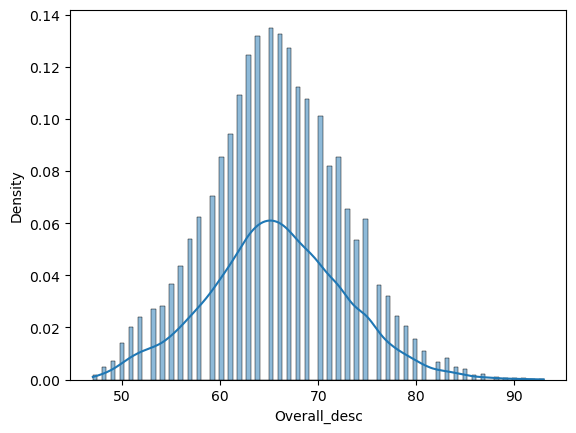

In [35]:
#FIFA21 players overall distribution. FIFA21所有球员的综合评分分布情况
sns.histplot(df['Overall_desc'],kde=True,stat='density', bins=100)

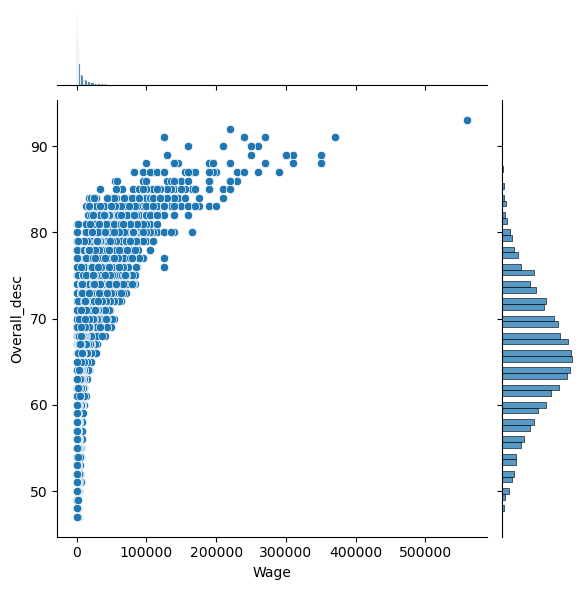

In [36]:
# we can see the subtle relationship between wage and player's ability
sns.jointplot(x='Wage',y='Overall_desc',data=df)

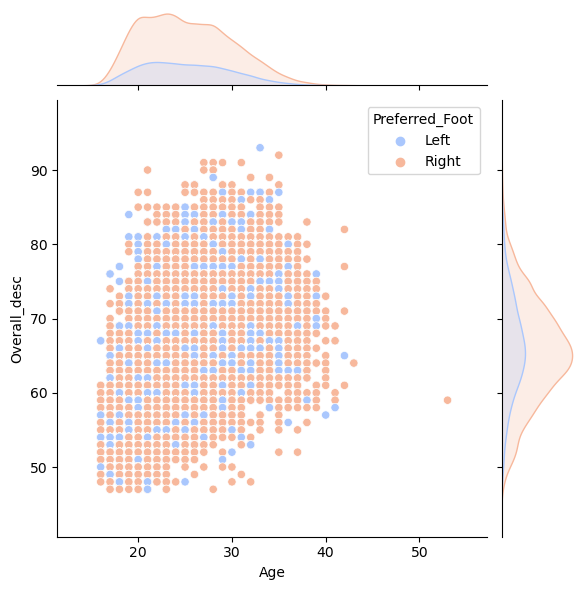

In [37]:
sns.jointplot(data=df, x='Age', y='Overall_desc', hue='Preferred_Foot',palette='coolwarm')
#There is even a dude over 50!

In [38]:
df.to_csv('cleaned_fifa_dataset.csv',index = True)